# File Flatenning

In [ ]:
import os
import sys

import pandas as pd
import numpy as np
from scripts.csvtopaquet import csv_to_parquet_single_file

current_directory = os.getcwd()
csv1_file_path = os.path.join(current_directory, '01-data', 'ex_fraud.csv')
csv2_file_path = os.path.join(current_directory, '01-data', 'ex_fraud2.csv')
csv3_file_path = os.path.join(current_directory, '01-data', 'ex1_Base.csv')
csv4_file_path = os.path.join(current_directory, '01-data', 'FD_creditcard_data.csv')

output_file_path1 = os.path.join(current_directory, '01-data', 'ex_fraud.parquet')
output_file_path2 = os.path.join(current_directory, '01-data', 'ex_fraud2.parquet')
output_file_path3 = os.path.join(current_directory, '01-data', 'ex1_Base.parquet')
output_file_path4 = os.path.join(current_directory, '01-data', 'FD_creditcard_data.parquet')
output_file_path5 = os.path.join(current_directory, '01-data', 'FD_creditcard_data.parquet')

'''
csv_to_parquet_single_file(csv_file_path=csv1_file_path, output_file_path=output_file_path1, chunksize=100000, sample_rows=None, drop_columns=None)
csv_to_parquet_single_file(csv_file_path=csv2_file_path, output_file_path=output_file_path2, chunksize=100000, sample_rows=None, drop_columns=None)
csv_to_parquet_single_file(csv_file_path=csv3_file_path, output_file_path=output_file_path3, chunksize=100000, sample_rows=None, drop_columns=None)
csv_to_parquet_single_file(csv_file_path=csv4_file_path, output_file_path=output_file_path4, chunksize=100000, sample_rows=None, drop_columns=None)
'''

# loading Data

In [1]:
import os
import sys
import pandas as pd
import numpy as np

current_directory = os.getcwd()

parquetFile4 = os.path.join(current_directory, '01-data', 'FD_creditcard_data.parquet')
parquetFile5 = os.path.join(current_directory, '01-data', 'FD_02_apl_train.parquet')
df4 = pd.read_parquet(parquetFile4)
df5 = pd.read_parquet(parquetFile5)

print('df5:', df5.dtypes)


df5: SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object


# Model comparsions

In [2]:
from scripts.models import logistic_regression_model,train_and_evaluate_decision_tree,train_and_evaluate_random_forest,train_and_evaluate_knn,train_and_evaluate_gaussian_nb
print('')
_= logistic_regression_model(df=df4, target_column='Class', drop_columns=['id'], add_constant=True, return_type='R2')
_= train_and_evaluate_decision_tree(df4, 'Class', ['Class', 'id'],test_size=0.3, random_state=42, return_accuracy_only=True, top_n_features=20)
_= train_and_evaluate_random_forest(df4, 'Class', ['id'], return_accuracy_only=True)
_= train_and_evaluate_knn(df4, 'Class', ['id'], n_neighbors=5, return_accuracy_only=True)
_= train_and_evaluate_gaussian_nb(df4, 'Class', ['id'], return_accuracy_only=True)


/Users/danramirez/mbs-fraud-detection/fraudenv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm



Logistic R^2: 0.8852229952408436
Decision Tree Accuracy: 99.80%
KNN Accuracy: 99.67%
Gaussian Naive Bayes Accuracy: 98.28%


# Model Details review

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.91      0.92     84841
           1       0.14      0.16      0.15      7413

    accuracy                           0.85     92254
   macro avg       0.53      0.54      0.54     92254
weighted avg       0.86      0.85      0.86     92254



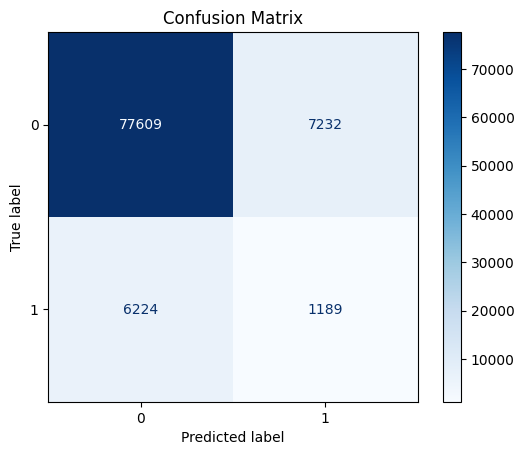

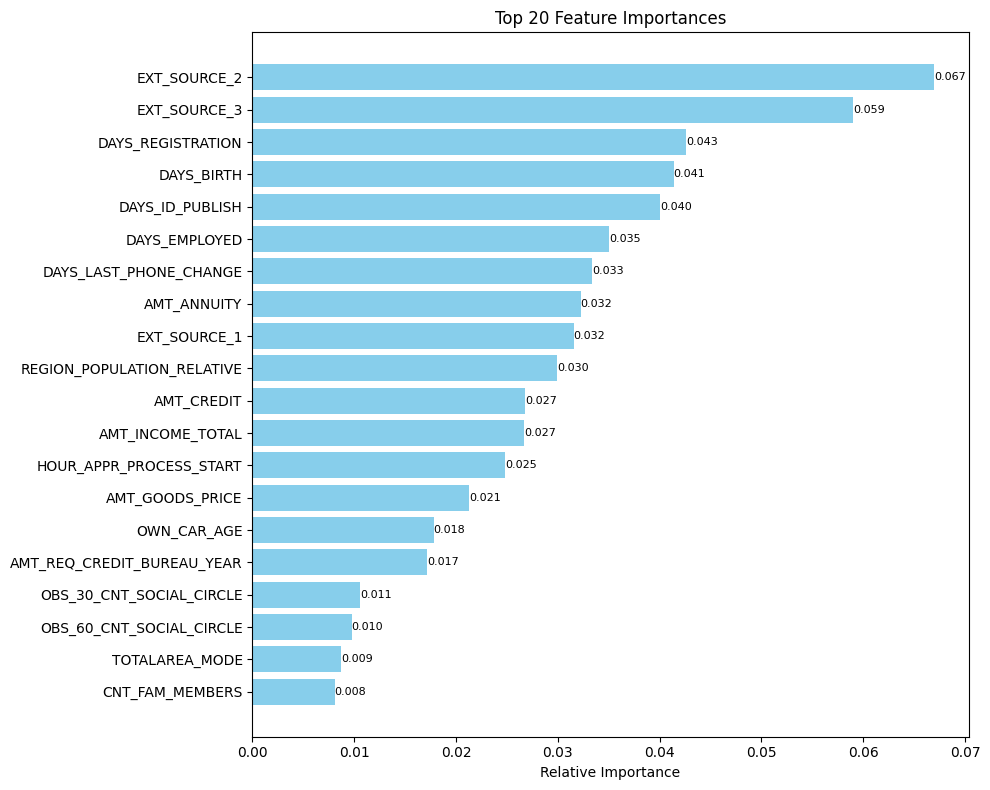

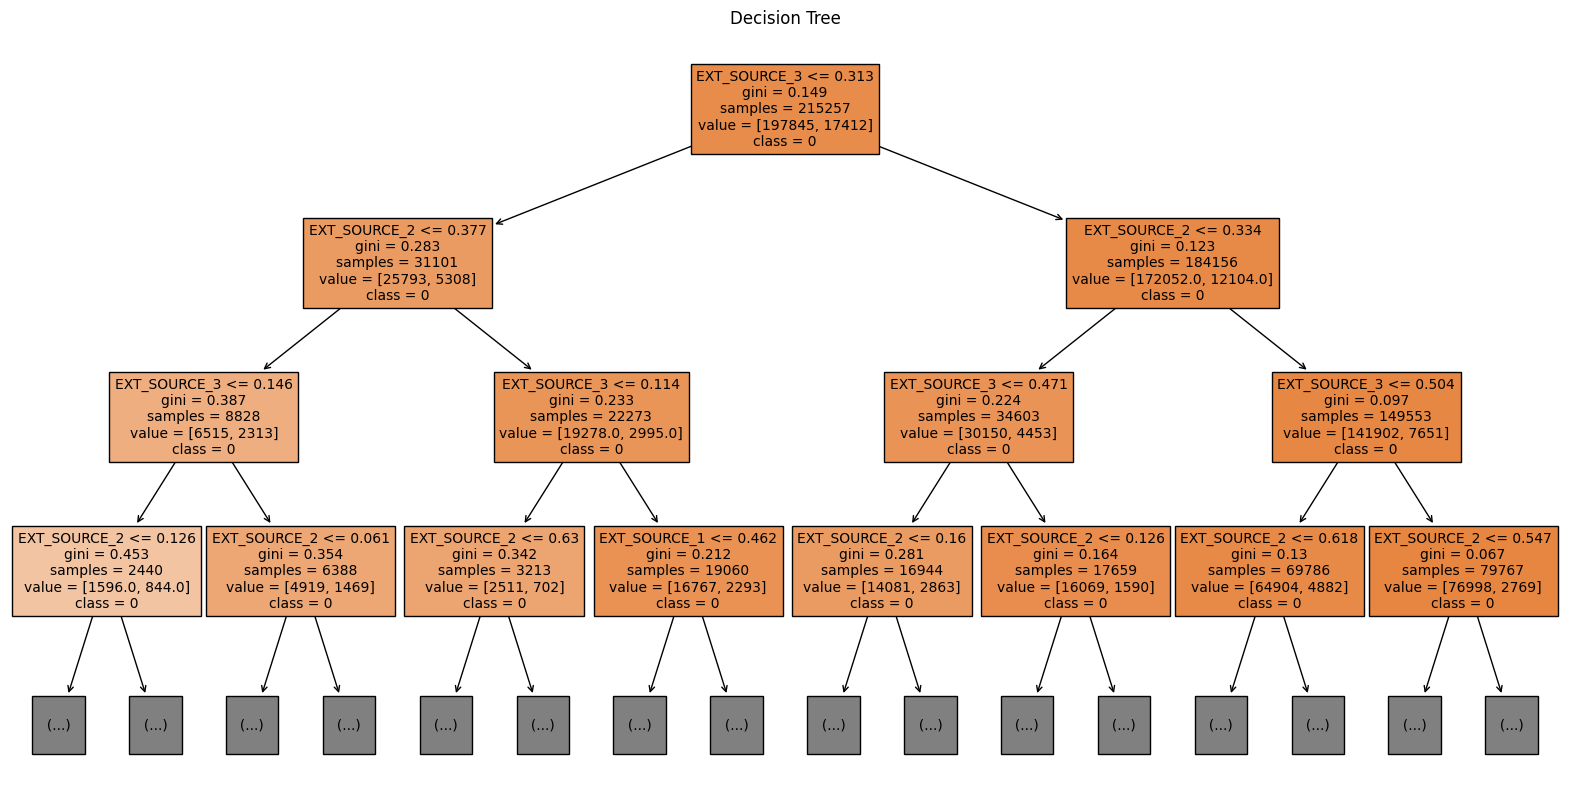

In [3]:
from scripts.dataclean import preprocess_for_lightgbm
from scripts.models import logistic_regression_model,train_and_evaluate_decision_tree,train_and_evaluate_random_forest,train_and_evaluate_knn,train_and_evaluate_gaussian_nb

processed_data = preprocess_for_lightgbm(df5, 'SK_ID_CURR')
train_and_evaluate_decision_tree(processed_data, target_column='TARGET', drop_columns=[], return_accuracy_only=False)


# SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.pipeline import Pipeline 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
df4
# Assuming your DataFrame and target variable setup
x4 = df4.drop('Class', axis=1)
y4 = df4['Class']

X_train, X_test, y_train, y_test = train_test_split(x4, y4, test_size=0.4, random_state=0)


lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
predicted1 = lr.predict(X_test)

#r1 = (classification_report(y_test, predicted1,output_dict=True))
r1 = (classification_report(y_test, predicted1))
print(r1)


resampling = SMOTE()
lr = LogisticRegression(max_iter=1000)

pipeline = Pipeline([('SMOTE', resampling), ('Logistic Regression', lr)])
pipeline.fit(X_train, y_train)
predicted2 = pipeline.predict(X_test)

r2 = print(classification_report(y_test, predicted2))

resampling = BorderlineSMOTE(kind='borderline-1')
lr = LogisticRegression(max_iter=1000)

pipeline = Pipeline([('BSMOTE', resampling), ('Logistic Regression', lr)])
pipeline.fit(X_train, y_train)
predicted3 = pipeline.predict(X_test)

r3 = (classification_report(y_test, predicted3))
print(r3)

###HOW TO ACCESS THE CLASSIFICATION REPORT SCORES
r1_f1_score = round((classification_report(y_test, predicted1,output_dict=True))['macro avg']['f1-score'],2)
r2_f1_score = round((classification_report(y_test, predicted2,output_dict=True))['macro avg']['f1-score'],2)
r3_f1_score = round((classification_report(y_test, predicted3,output_dict=True))['macro avg']['f1-score'],2)

print(f'r1_f1_score:{r1_f1_score}\nr2_f1_score:{r2_f1_score}\nr3_f1_score:{r3_f1_score}')